## Exploratory Data Analysis on USA College Basketball dataset.

Read more: https://www.ncaa.com/history/basketball-men/d1

The end-goal is to learn the history/trends of college basketball and what is the formula for success in a team.

### Table of Contents

- Objectives
    - Types of Data in Dataset


- Exploratory Data Analysis
    - Import libraries and file
    - First look at 2019 Dataset
    - Number of games played
    - Number of teams in each conferences
    - Number of teams that qualify to March Madness
    - Heatmap of the correlations
    - Winners of the NCAA Basketball Tournament
    - Scatterplot for how to qualify to NCAA Tournament

### Objectives

**EDA - Curious Questions - interested to know what you would suggest in the discussion below**
* How many teams are there in each conference for 2019?
* How many teams make it to March Madness 2019?
* Who are the winners in March Madness for 2019 and for the historical years? (PostSeason Field)

**What are the success factors for a contending team to qualify / Final Four and could a underdog be successful in the March Madness 2015-2019?**
* Matrix for the relationships of the fields (non Categorical)

**What is more valuable, offensive or defensive rating?**
* Scatter plot of the teams in terms of Offensive rating and Defensive Rating - Highlight the qualifiers in colour (Effective Field Goal Percentage Shot/Allowed)

### Features

- **TEAM**: The Division I college basketball school
- **CONF**: The Athletic Conference in which the school participates in
- **G**: Number of games played
- **W**: Number of games won
- **ADJOE**: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
- **ADJDE**: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
- **BARTHAG**: Power Rating (Chance of beating an average Division I team)
- **EFG_O**: Effective Field Goal Percentage Shot
- **EFG_D**: Effective Field Goal Percentage Allowed
- **TOR**: Turnover Percentage Allowed (Turnover Rate)
- **TORD**: Turnover Percentage Committed (Steal Rate)
- **ORB**: Offensive Rebound Percentage
- **DRB**: Defensive Rebound Percentage
- **FTR**: Free Throw Rate (How often the given team shoots Free Throws)
- **FTRD**: Free Throw Rate Allowed
- **2P_O**: Two-Point Shooting Percentage
- **2P_D**: Two-Point Shooting Percentage Allowed
- **3P_O**: Three-Point Shooting Percentage
- **3P_D**: Three-Point Shooting Percentage Allowed
- **ADJ_T**: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
- **WAB**: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
- **POSTSEASON**: Round where the given team was eliminated or where their season ended
- **SEED**: Seed in the NCAA March Madness Tournament
- **YEAR**: Season

# Import Libaries and file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("cbb.csv")
print(df.head(10))

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   
5        Kentucky  SEC  40  29  117.2   96.2   0.9062   49.9   46.0  18.1   
6        Michigan  B10  38  30  121.5   93.7   0.9522   54.6   48.0  14.6   
7            Duke  ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
8        Virginia  ACC  38  35  123.0   89.9   0.9736   55.2   44.7  14.7   
9  North Carolina  ACC  39  33  121.0   91.5   0.9615   51.7   48.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  


# College basketball in 2019

Let's first look at 2019 data to understand the format and number of teams

In [4]:
df_19 = pd.read_csv("cbb19.csv")
# df_19 = pd.read_csv("cbb.csv")
print(df_19.head())

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0         Gonzaga  WCC  37  33  123.4   89.9   0.9744   59.0   44.2  14.9   
1        Virginia  ACC  38  35  123.0   89.9   0.9736   55.2   44.7  14.7   
2            Duke  ACC  38  32  118.9   89.2   0.9646   53.6   45.0  17.5   
3  North Carolina  ACC  36  29  120.1   91.4   0.9582   52.9   48.9  17.2   
4        Michigan  B10  37  30  114.6   85.6   0.9665   51.6   44.1  13.9   

   ...   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  
0  ...  35.3  25.9  61.4  43.4  36.3  30.4   72.0   7.0          E8   1.0  
1  ...  29.1  26.3  52.5  45.7  39.5  28.9   60.7  11.1   Champions   1.0  
2  ...  33.2  24.0  58.0  45.0  30.8  29.9   73.6  11.2          E8   1.0  
3  ...  30.2  28.4  52.1  47.9  36.2  33.5   76.0  10.0         S16   1.0  
4  ...  27.5  24.1  51.8  44.3  34.2  29.1   65.9   9.2         S16   2.0  

[5 rows x 23 columns]


In [5]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        353 non-null    object 
 1   CONF        353 non-null    object 
 2   G           353 non-null    int64  
 3   W           353 non-null    int64  
 4   ADJOE       353 non-null    float64
 5   ADJDE       353 non-null    float64
 6   BARTHAG     353 non-null    float64
 7   EFG_O       353 non-null    float64
 8   EFG_D       353 non-null    float64
 9   TOR         353 non-null    float64
 10  TORD        353 non-null    float64
 11  ORB         353 non-null    float64
 12  DRB         353 non-null    float64
 13  FTR         353 non-null    float64
 14  FTRD        353 non-null    float64
 15  2P_O        353 non-null    float64
 16  2P_D        353 non-null    float64
 17  3P_O        353 non-null    float64
 18  3P_D        353 non-null    float64
 19  ADJ_T       353 non-null    f

In [6]:
df_19.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,68.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,28.420397,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569,8.794118
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,2.923335,4.708719,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550,4.698551
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,21.700000,21.900000,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000,1.000000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,26.300000,29.900000,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000,5.000000
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,28.300000,33.300000,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000,9.000000
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,30.400000,35.900000,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000,13.000000
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,37.100000,48.100000,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000,16.000000


In [7]:
print(df_19.shape)

(353, 23)


In [8]:
print(df_19.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        353 non-null    object 
 1   CONF        353 non-null    object 
 2   G           353 non-null    int64  
 3   W           353 non-null    int64  
 4   ADJOE       353 non-null    float64
 5   ADJDE       353 non-null    float64
 6   BARTHAG     353 non-null    float64
 7   EFG_O       353 non-null    float64
 8   EFG_D       353 non-null    float64
 9   TOR         353 non-null    float64
 10  TORD        353 non-null    float64
 11  ORB         353 non-null    float64
 12  DRB         353 non-null    float64
 13  FTR         353 non-null    float64
 14  FTRD        353 non-null    float64
 15  2P_O        353 non-null    float64
 16  2P_D        353 non-null    float64
 17  3P_O        353 non-null    float64
 18  3P_D        353 non-null    float64
 19  ADJ_T       353 non-null    f

In [9]:
df_19.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

<a id="gamesplayed"></a>
### Number of games played

Let's see if all teams have played the same amount of games

<AxesSubplot:xlabel='Games_Played', ylabel='Density'>

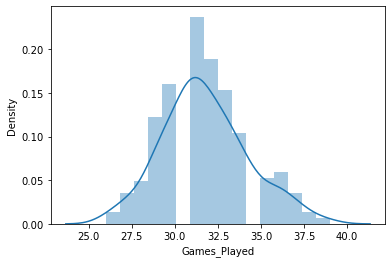

In [10]:
df_19['Games_Played'] = df_19['G']
sns.distplot(df_19['Games_Played'])

It's good to bare in mind that not all teams have played the same amount of games

In [11]:
df_19['W_ratio'] = df_19['W'] / df_19['G']

In [12]:
df_19.sort_values(by='W_ratio', ascending=False).head(20)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Games_Played,W_ratio
25,Wofford,SC,32,30,116.4,97.1,0.8892,57.5,49.9,16.1,...,53.9,50.6,41.4,32.6,67.1,4.0,R32,7.0,32,0.937500
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,38,0.921053
22,Buffalo,MAC,35,32,113.6,95.3,0.8819,53.4,47.3,16.0,...,55.7,49.3,33.7,29.3,74.9,5.5,R32,6.0,35,0.914286
47,New Mexico St.,WAC,33,30,111.8,98.2,0.8155,54.1,48.9,17.8,...,56.7,48.0,34.0,33.5,67.1,1.4,R64,12.0,33,0.909091
48,Murray St.,OVC,31,28,110.4,98.6,0.7852,54.8,46.5,17.2,...,56.2,48.3,34.9,28.9,70.2,1.2,R32,12.0,31,0.903226
61,Abilene Christian,Slnd,30,27,100.9,100.7,0.5064,51.9,49.8,17.3,...,49.5,49.8,37.7,33.3,67.1,-2.6,R64,15.0,30,0.900000
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0,37,0.891892
10,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,51.3,43.0,35.5,27.9,67.3,7.8,S16,3.0,37,0.891892
49,Liberty,BSth,33,29,109.2,99.6,0.7428,55.9,48.9,17.2,...,56.4,48.3,36.8,33.3,63.5,-0.6,R32,12.0,33,0.878788
50,UC Irvine,BW,36,31,107.2,97.6,0.7458,51.3,44.1,17.5,...,50.1,40.7,35.9,33.9,66.6,0.7,R32,13.0,36,0.861111


### Number of Teams in each conferences

How many teams are there in each conference?

In [13]:
df_19['CONF'].value_counts()

ACC     15
B10     14
SEC     14
CUSA    14
A10     14
Slnd    13
P12     12
BSky    12
SB      12
BSth    12
OVC     12
MEAC    12
MAC     12
Amer    12
MWC     11
MAAC    11
SC      10
NEC     10
CAA     10
SWAC    10
Horz    10
BE      10
Pat     10
B12     10
MVC     10
WCC     10
AE       9
BW       9
WAC      9
Sum      8
Ivy      8
ASun     8
Name: CONF, dtype: int64

In [14]:
df_19['CONF'].count()

353

### Number of Teams qualify to March Madness

How many teams make it to the March Madness?

In [15]:
df_19['SEED'].notna().sum()
# df['SEED'].count()

68

In [16]:
d=df_19['SEED'].notna().sum()/df_19['TEAM'].count()
print ("Percentage of college teams that make it to the March Madness: "+"{:.2%}".format(d))

Percentage of college teams that make it to the March Madness: 19.26%


In [17]:
df_19['POSTSEASON'].unique()

array(['E8', 'Champions', 'S16', 'F4', '2ND', 'R64', 'R32', 'R68', nan],
      dtype=object)

In [18]:
df_19['POSTSEASON'].value_counts()

R64          32
R32          16
S16           8
E8            4
R68           4
F4            2
Champions     1
2ND           1
Name: POSTSEASON, dtype: int64

In [19]:
df_19['SEED'].value_counts()

11.0    6
16.0    6
1.0     4
2.0     4
3.0     4
4.0     4
5.0     4
6.0     4
7.0     4
8.0     4
9.0     4
10.0    4
12.0    4
13.0    4
14.0    4
15.0    4
Name: SEED, dtype: int64

### Encoding data

As it is a categorical data - it's better to encode to integor value to undertake other analysis, this can also be done to the SEED Column.

In [20]:
d = {'Champions' : 1, '2ND' : 2, 'F4' : 3, 'E8' : 8, 'R68' : 5, 'S16' : 5, 'R32' : 6, 'R64' : 7}
df_19['POSTSEASON_Value'] = df_19['POSTSEASON'].map(d)

In [21]:
df_19.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Games_Played,W_ratio,POSTSEASON_Value
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,43.4,36.3,30.4,72.0,7.0,E8,1.0,37,0.891892,8.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,45.7,39.5,28.9,60.7,11.1,Champions,1.0,38,0.921053,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,45.0,30.8,29.9,73.6,11.2,E8,1.0,38,0.842105,8.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,47.9,36.2,33.5,76.0,10.0,S16,1.0,36,0.805556,5.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,44.3,34.2,29.1,65.9,9.2,S16,2.0,37,0.810811,5.0
5,Michigan St.,B10,39,32,119.9,91.0,0.9597,55.2,43.9,18.5,...,41.9,37.8,31.6,68.6,10.7,F4,2.0,39,0.820513,3.0
6,Kentucky,SEC,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,...,43.6,35.4,34.3,66.9,8.8,E8,2.0,37,0.810811,8.0
7,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,44.7,36.7,35.4,68.8,9.9,S16,2.0,36,0.861111,5.0
8,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2ND,3.0,38,0.815789,2.0
9,Purdue,B10,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,...,47.2,37.4,34.2,67.0,6.1,E8,3.0,36,0.722222,8.0


# Heatmap Matrix of the correlations

What is more valuable, offensive or defensive rating?

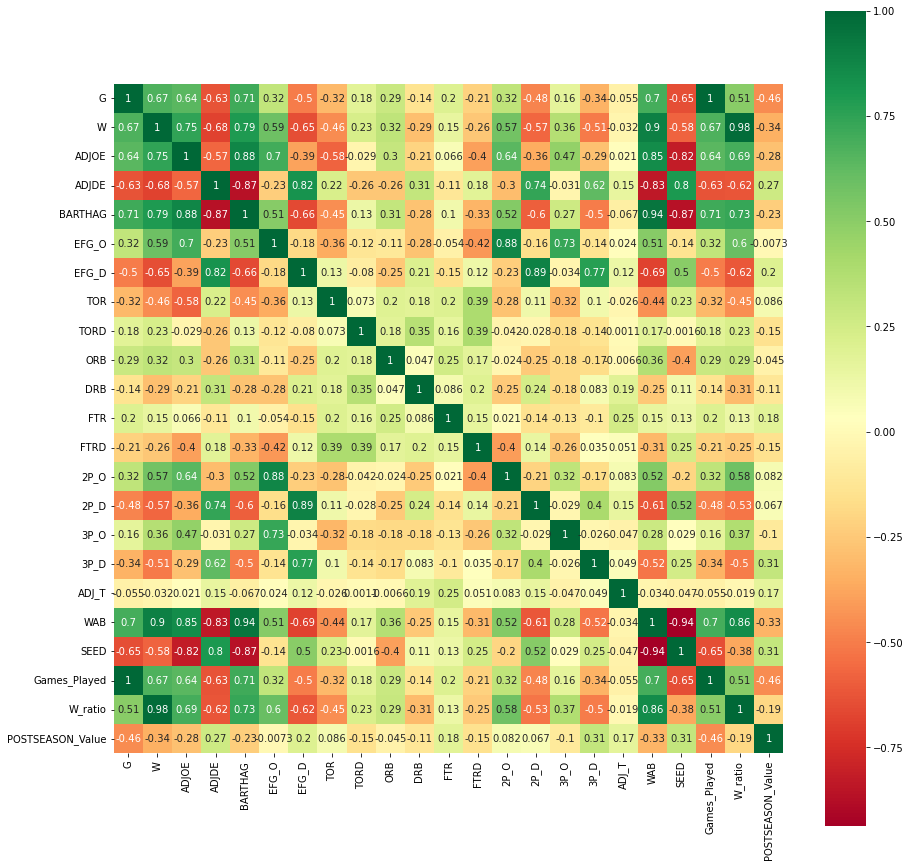

In [22]:
plt.figure(figsize=(15,15))
df_corr = df_19.drop(columns=['TEAM', 'CONF','POSTSEASON'])
p=sns.heatmap(df_corr.corr(), annot=True, cmap='RdYlGn', square=True)

In [23]:
corr_mat = df_corr.corr()

In [24]:
corr_mat['W_ratio']

so = corr_mat['W_ratio'].sort_values(kind="quicksort", ascending=False)

print(so)

W_ratio             1.000000
W                   0.977414
WAB                 0.855277
BARTHAG             0.731502
ADJOE               0.693909
EFG_O               0.599316
2P_O                0.577746
G                   0.507412
Games_Played        0.507412
3P_O                0.373980
ORB                 0.291930
TORD                0.226335
FTR                 0.129755
ADJ_T              -0.018665
POSTSEASON_Value   -0.188566
FTRD               -0.246551
DRB                -0.306455
SEED               -0.376435
TOR                -0.449095
3P_D               -0.501549
2P_D               -0.527917
EFG_D              -0.615129
ADJDE              -0.622331
Name: W_ratio, dtype: float64


we can see that wining ration is highly dependent on ADJOE and BARTHAG

### Winners of the NCAA Basketball Tournament

In [25]:
array1 = ['Champions']
df1=df.loc[df['POSTSEASON'].isin(array1)]

df1.sort_values(by='YEAR', ascending=False) #Filter for the Champions by each year

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,35.7,48.1,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013


We can see that the team Villanova were Champions in 2016 and 2018 - which they are featured at the top of the notebook celebrating :-)

In [26]:
array2 = ['Virginia', 'Villanova', 'North Carolina', 'Duke']
df2=df.loc[df['TEAM'].isin(array2)]

df2.sort_values(['TEAM', 'YEAR'], ascending=[False, False]) #Filter by champion team history

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
2161,Virginia,ACC,34,31,114.6,86.7,0.9612,52.7,44.3,14.0,...,26.2,50.1,42.8,38.3,31.0,60.5,11.3,R64,1.0,2018
2045,Virginia,ACC,34,23,111.8,86.9,0.9477,52.4,46.1,15.6,...,33.8,49.7,45.1,38.5,31.7,60.3,5.0,R32,5.0,2017
17,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
2040,Virginia,ACC,34,30,112.1,84.1,0.9648,50.6,42.3,15.7,...,28.6,49.7,40.1,35.2,30.8,58.4,10.0,R32,2.0,2015
2439,Virginia,ACC,37,30,114.6,89.5,0.9449,50.8,44.2,16.5,...,32.5,49.0,42.1,36.9,32.3,61.2,8.2,S16,1.0,2014
1893,Virginia,ACC,35,23,107.4,90.3,0.8798,51.6,44.1,18.2,...,31.8,48.9,42.7,38.5,31.2,60.7,-1.5,NaN,NaN,2013
2081,Villanova,BE,36,26,114.6,98.9,0.8448,53.2,50.4,16.9,...,28.2,53.7,49.7,35.2,34.3,65.1,3.6,R32,6.0,2019
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
2077,Villanova,BE,36,32,122.2,92.5,0.9611,57.5,48.1,17.1,...,22.1,59.2,49.1,36.9,31.1,65.6,11.1,R32,1.0,2017


From this querying of the table, we can see that AJDE and the Barthag scores are very high in the fields (above 80 and 84%.

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team)

### Scatterplot for how to qualify to NCAA Tournament

Let's first clean the data to binary if the team qualify or not qualify for 2015-2019 data.

In [27]:
df['Not_Qualified'] = pd.isna(df['SEED'])

<AxesSubplot:xlabel='EFG_D', ylabel='EFG_O'>

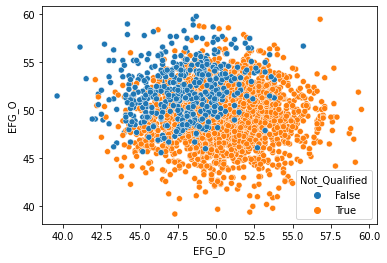

In [28]:
sns.scatterplot(y=df['EFG_O'], x=df['EFG_D'], hue=df['Not_Qualified'])

The scatter plot shows it is important for a team to have high Effective Field Goal Percentage Shot (EFG_O) and low Effective Field Goal Percentage Allowed (EFG_D) in order to have higher chance to qualify from (2015-2019).

<AxesSubplot:xlabel='3P_O', ylabel='2P_O'>

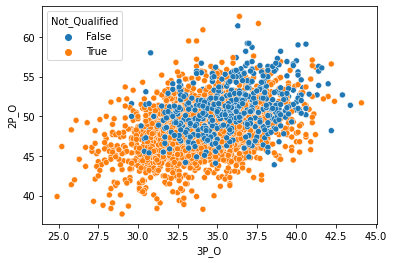

In [29]:
df['Not_Qualified'] = pd.isna(df['SEED'])
sns.scatterplot(y=df['2P_O'], x=df['3P_O'], hue=df['Not_Qualified'])